In [ ]:
# https://azisava.sakura.ne.jp/mandelbrot/definition.html
# マンデルブロ集合とは、超簡単な漸化式で発散しない点の集合。真ん中の黄色部分が発散しないマンデルブロ集合。
# 自己相似性を持つ

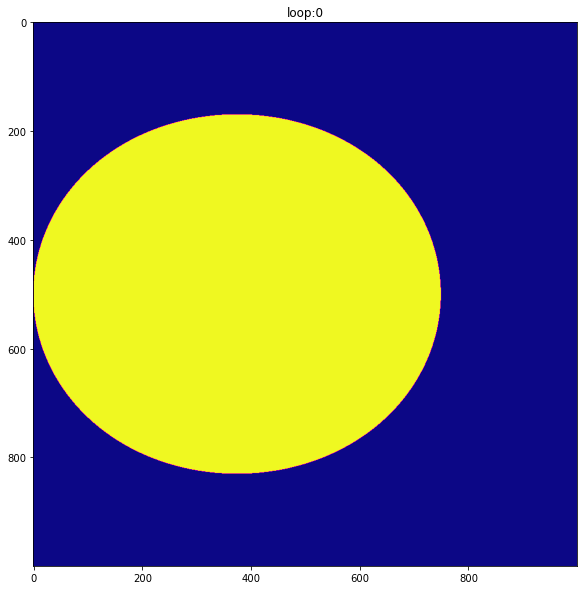

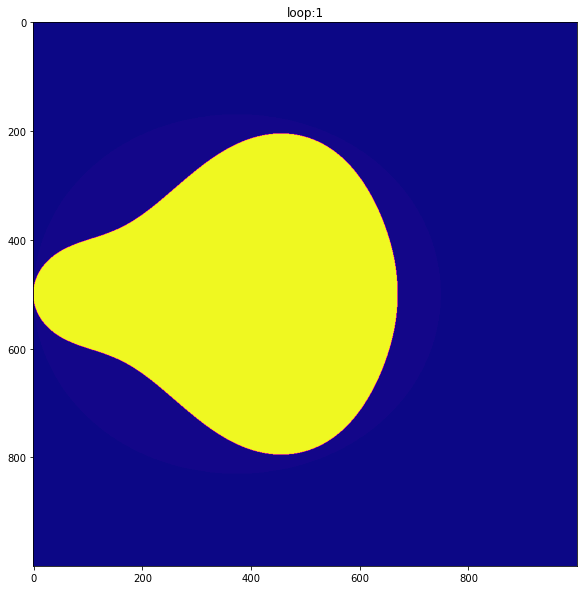

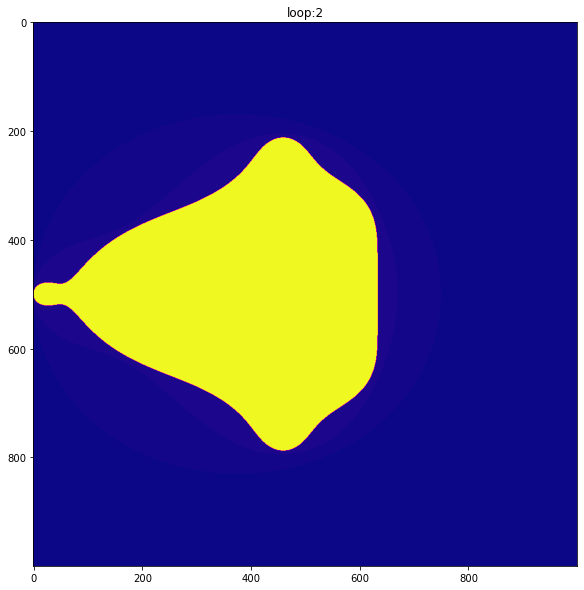

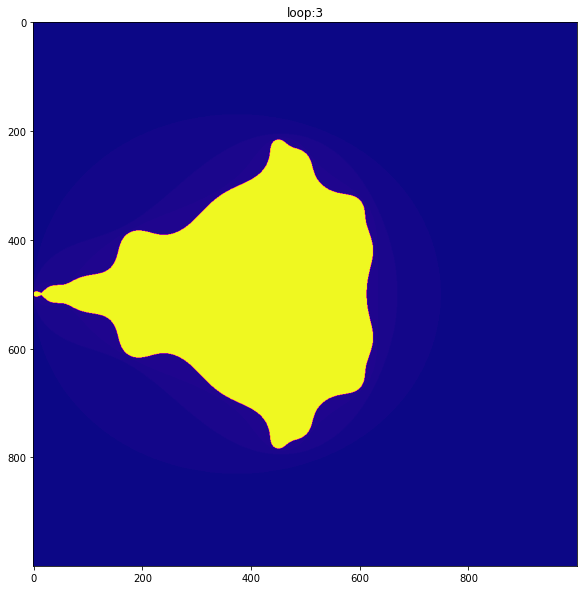

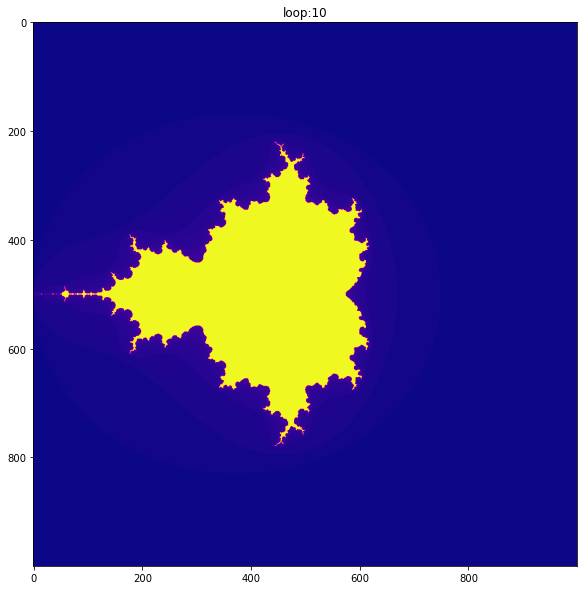

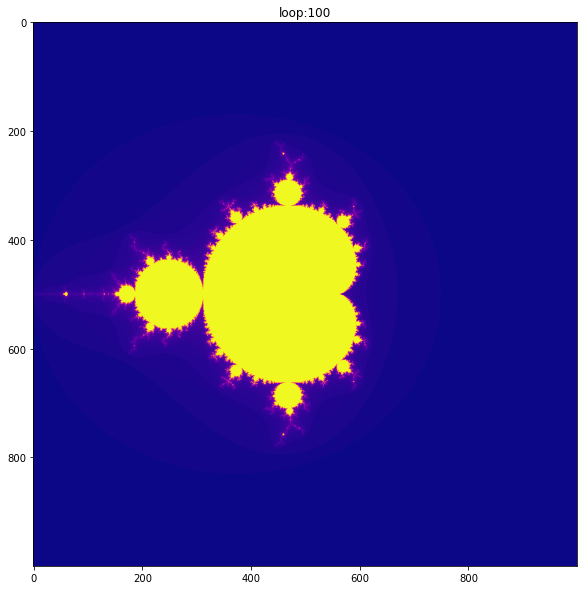

In [7]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

n = 1000
a = np.linspace(-2, 2, n)
b = np.linspace(-2, 2, n)
x, y = np.meshgrid(a, b)
c = x + y * 1j
# numpy で1jは1虚数単位
# これで複素平面上にcをn*n作った

loop = 101
z = c
times = loop + np.zeros(z.shape, dtype=int)
# np.zerosでn*nのゼロ行列を作り、その全要素をloopとする。たとえばloop=5なら全要素5のn*n行列
# その後発散した点を、いつ発散したかわかるように、発散時ループ数で置き換える。
for i in range(loop):
    # 以下zはn*n行列の個数だけある
    z = z**2 + c
    # マンデルブロ漸化式、z**2でもz**3でもz**4でもよい
    diverge = z*np.conj(z) > 2**2
    # z*共役複素数conjugate、つまりz絶対値の2乗、が2**2より大きければTrue 1、そうでなければFalse 0
    # 2**2を超えれば結局発散するので2**2を使う
    div = diverge & (times==loop)
    # timesとloopが同じところはTrue、それとdivergeのAND、つまり両方1の時は1、をn*n行列の全要素で調べる
    # なぜかi=0のときだけは違う動き
    times[div] = i
    # times行列の[div=True]のところはiを代入、発散時のループ数で置き換える
    z[diverge] = 2
    # 発散したzは2としてしまうのは計算不可を減らすため、この行をなくしても可能は可能
    #print('diverge', diverge)
    #print('times==loop', times==loop)
    #print('div', div)
    #print('times', times)

    if i in [0, 1, 2, 3, 10, 100]:
        plt.figure(figsize=(10,10))
        plt.imshow(times, cmap="plasma")
        plt.title('loop:' + str(i))
        plt.show()